# Comparison of $H-0$ data and $H_R$ data

In this notebook we will plot $H_0$ vs $H_2SO_4$ concentration (\%wt) and compare it wit the equivalent values for $H_R$.

In [13]:
##############################################################
### Set up libraries and global variables
##############################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.interpolate import CubicSpline  # A function for interpolating a plot using the cubic spline method
from scipy.interpolate import interp1d     # A function for interpolating a plot using the connect-the-dots method
from scipy.signal import savgol_filter


#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"
github_H0_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/data/H0_data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

molwtH2SO4 = 98.08
molwtH20 = 18.0
densityH2SO4 = 1.83
densityH2O = 1.000




In [5]:
# data for activity values
Filename = github_location+"Giauque_Table9_activityH2OinH2SO4.csv"

df1 = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 

display(df1)

molal = df1["conc H2SO4 / m"]
mass_add_to_1_kg_water = molal * molwtH2SO4
total_mass_solution = mass_add_to_1_kg_water + 1000
percent_H2SO4 = mass_add_to_1_kg_water / total_mass_solution * 100

df1["%H2SO4"] = percent_H2SO4

display(df1)

,conc H2SO4 / m,a_H2O
0,1,9.622000e-01
1,2,9.130000e-01
2,3,8.514000e-01
3,4,7.800000e-01
4,5,7.035000e-01
5,6,6.257000e-01
6,7,5.503000e-01
7,8,4.806000e-01
8,9,4.175000e-01
9,10,3.611000e-01


,conc H2SO4 / m,a_H2O,%H2SO4
0,1,9.622000e-01,8.931954
1,2,9.130000e-01,16.399144
2,3,8.514000e-01,22.734578
3,4,7.800000e-01,28.177430
4,5,7.035000e-01,32.903918
5,6,6.257000e-01,37.046737
6,7,5.503000e-01,40.707713
7,8,4.806000e-01,43.966290
8,9,4.175000e-01,46.885357
9,10,3.611000e-01,49.515347


36 1
36


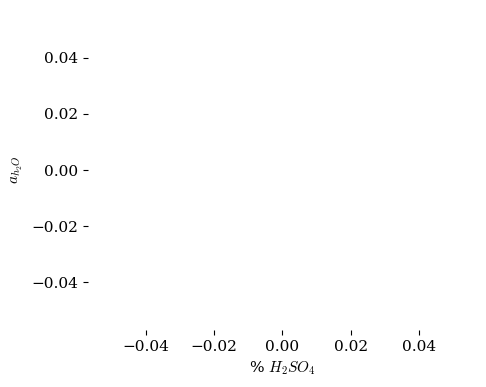

In [23]:
style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)

x_label = "% ${H_2SO_4}$"
y_label = "$a_{h_2O}$"
ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
       )


x= df1["%H2SO4"]
y = df1["a_H2O"]
#y = np.log10(df1["a_H2O"]) 

y=savgol_filter(y,
                window_length = 5, # window size used for filtering
                polyorder = 3), # order of fitted polynomial


print(len(x), len(y))
#print(x)
print(len(y[0]))



In [ ]:
print(y)
ax.plot(x, y, color='black', zorder=1, linewidth=0.5)

ax.scatter(x,y, s=128, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', zorder=3)
ax.scatter(x,y, s=16, color="white", marker='o', zorder=3)



plt.show()
